In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random 
from datetime import datetime
from scipy import stats


import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from IPython.core.display import Image, HTML
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline


In [173]:
df=pd.read_csv("USA_Housing.csv", na_filter=False)

In [174]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [175]:
df.describe
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [176]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [177]:
compare = df[['Avg. Area Income', 'Avg. Area Number of Rooms', 'Price']]

In [178]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
# There is more of a correlation between price Area income, House age, and population
df.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Avg. Area Income'>

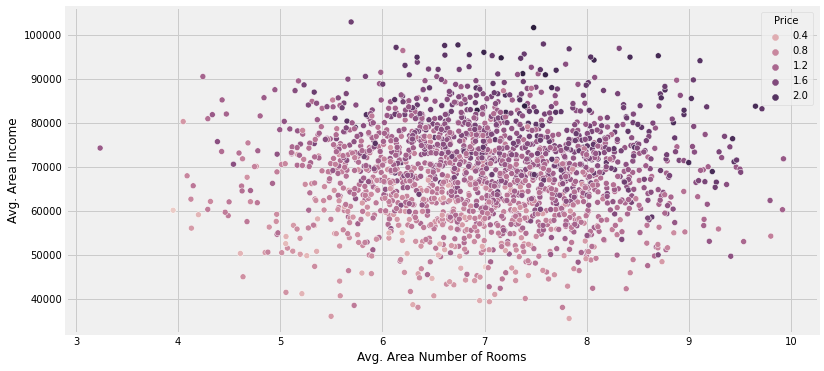

In [179]:
sns.scatterplot(data=compare.sample(n=2000), x="Avg. Area Number of Rooms", y="Avg. Area Income", hue='Price')

# Can see that the avg area income is around 70k 
# avg number of rooms is around 7
# The price becomes more expensive as more rooms and imcome increases

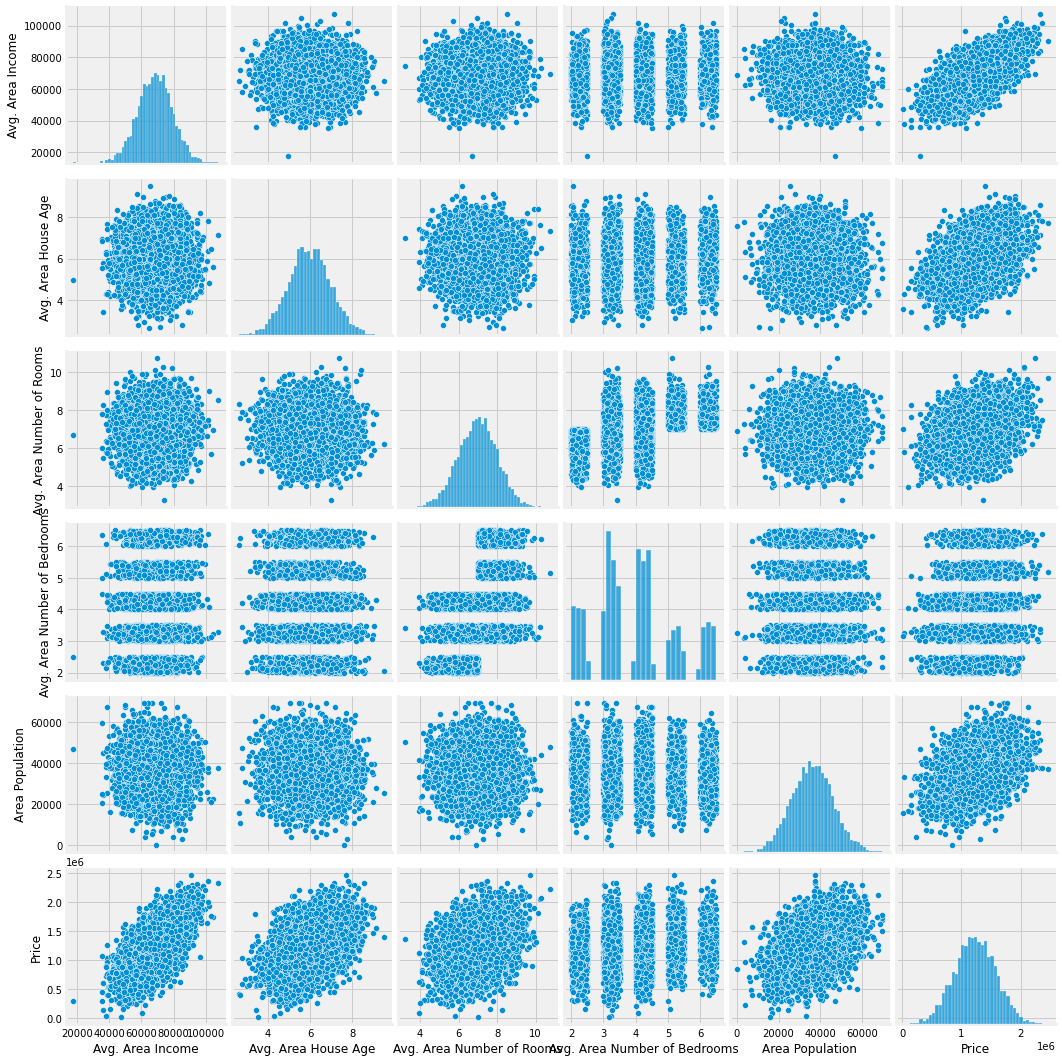

In [180]:
sns.pairplot(df)
#Shows a correclation between the data below 

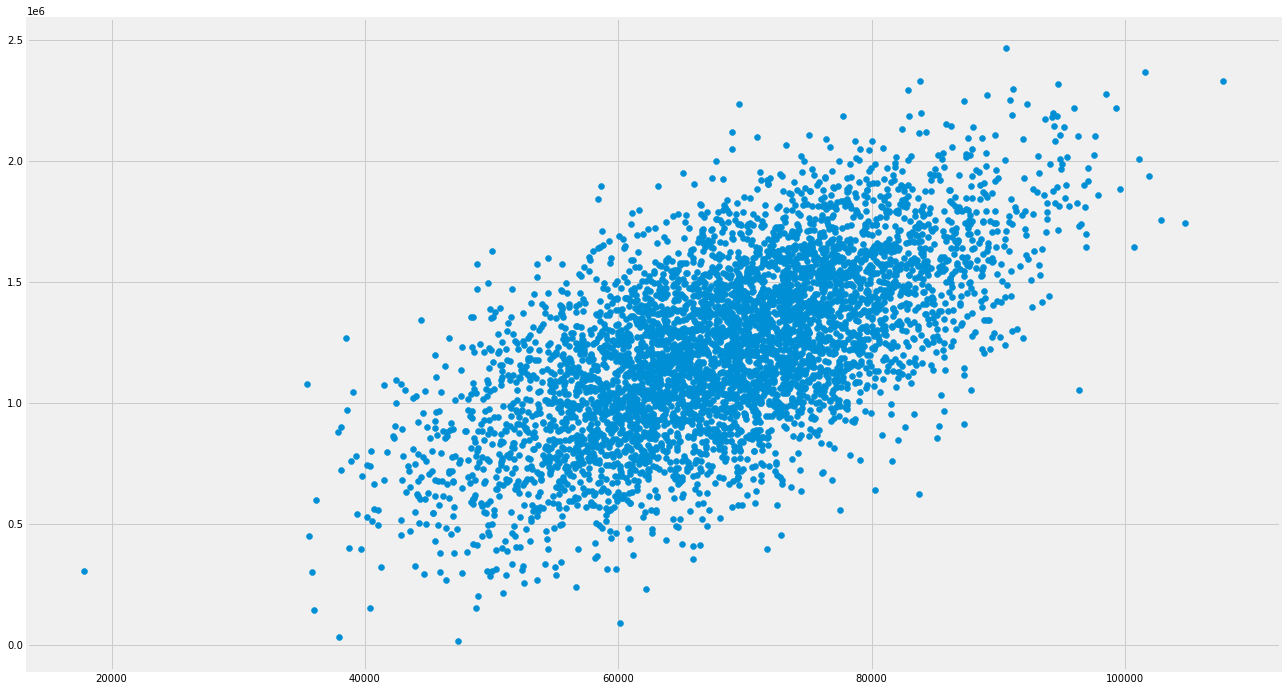

In [181]:
plt.figure(figsize=(20,12))
plt.scatter(df['Avg. Area Income'],df['Price'])
# Seeing how area income and price compare 

In [182]:
X = ['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']


<AxesSubplot:>

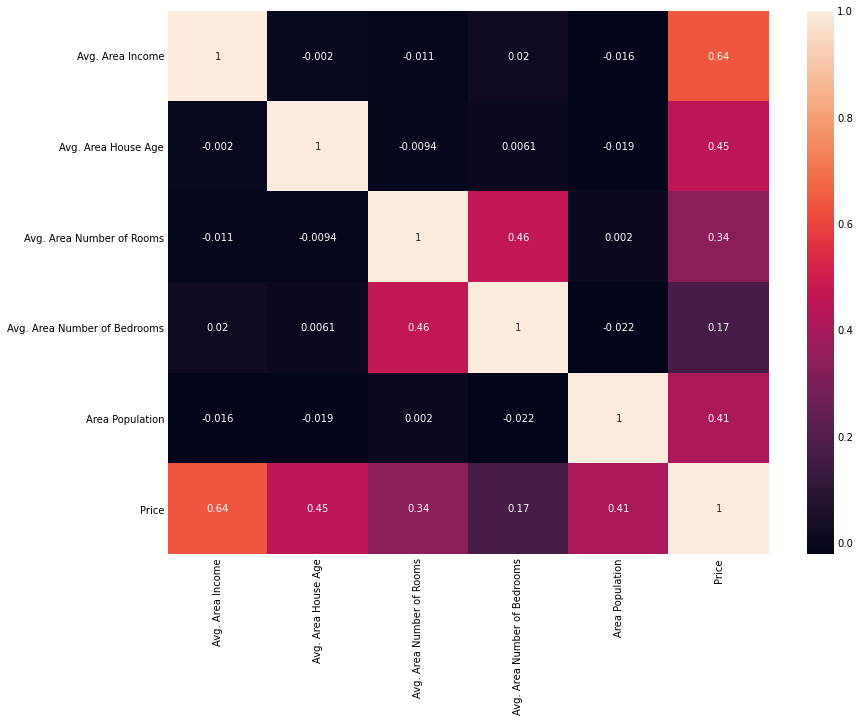

In [183]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
# Distribution of data between the columns and price

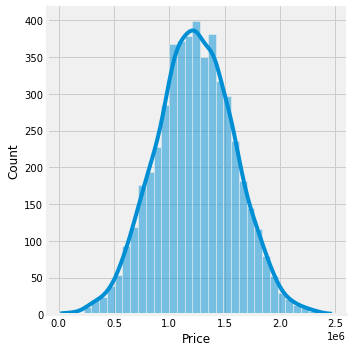

In [195]:
sns.displot(data= compare, x='Price' , bins=35 , kde=True, height=5)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

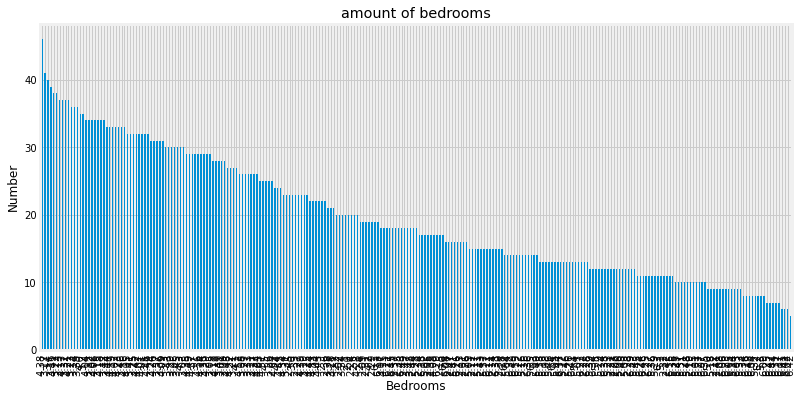

In [196]:
df['Avg. Area Number of Bedrooms'].sample(n=5000).value_counts().plot(kind='bar')
plt.title('amount of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Number')
sns.despine
# The most sold houses are houses with 4.38 bedrooms

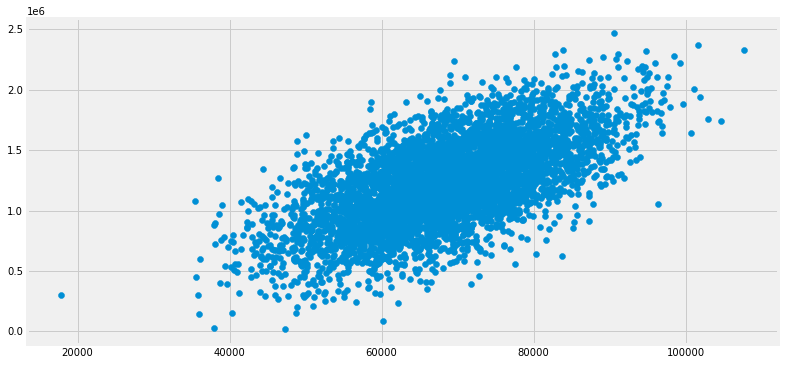

In [197]:
plt.scatter((df['Avg. Area Income']+df['Avg. Area House Age']),df['Price'])

In [198]:
# The Address can be drop from the dataframe
df = df.drop(['Address'], axis=1)
df.head()

KeyError: "['Address'] not found in axis"

In [ ]:
# Preprocessing done to tranform the raw data into an understandable format
pre_process = preprocessing.StandardScaler()

In [ ]:
# Storing Price as the label 
feature = df.drop(['Price'], axis = 1)
label = df.Price

feature = pre_process.fit_transform(feature)

In [199]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

y = df['Price']

df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [200]:
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import zscore
y = pd.Series(zscore(y),index=y.index)
X = pd.DataFrame(data=zscore(X), index=X.index, columns=X.columns)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [216]:
from sklearn import metrics

print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE 0.23027274376312704
MSE: 0.08101725519794249
RMSE: 0.2846353020936484


In [217]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lm=LinearRegression()
lm.fit(X_train,y_train)
lm.intercept_

coeff=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
coeff



,coeff
Avg. Area Income,0.650938
Avg. Area House Age,0.464546
Avg. Area Number of Rooms,0.343236
Avg. Area Number of Bedrooms,0.006989
Area Population,0.431203


In [218]:
prediction=lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
score_test = r2_score(lm.predict(X_train), y_train)
score_test

y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# MSE the lower the more accurate the model will be
# R2 the higher the more accurate 
# Linear Regression
print('MSE :' ,mse)
print('R2 :',r_squared)

MSE : 0.08101725519794249
R2 : 0.921171916540202


In [219]:
rr = Ridge()
rr.fit(X_train, y_train)
print(rr.intercept_)
coeff_df = pd.DataFrame(rr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df
#Ridge Regression
score_test = r2_score(rr.predict(X_train), y_train)
score_test
y_pred = rr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
# MSE the lower the more accurate the model will be
# R2 the higher the more accurate 
# Ridge
print('MSE :' ,mse)
print('R2 :',r_squared)

0.0008656082540451412
MSE : 0.08101464448317516
R2 : 0.9211744567107011


In [220]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train, y_train)

# Scoring the Random Tree

random_r3 = r2_score(random.predict(X_test), y_test)
random_r3
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
score_test3 = r2_score(rf.predict(X_train), y_train)
score_test3
y_pred = rf.predict(X_test)
# MSE the lower the more accurate the model will be
# R2 the higher the more accurate 
# Random Tree
print('MSE :' ,mse)
print('R2 :',r_squared)

MSE : 0.08101464448317516
R2 : 0.9211744567107011


In [221]:
ran = linear_model.RANSACRegressor()
ran.fit(X_train, y_train)
#Ransac 

ransac_r4 = r2_score(ran.predict(X_test), y_test)
ransac_r4
ran.fit(X_train, y_train)
score_test4 = r2_score(ran.predict(X_train), y_train)
score_test4
y_pred = ran.predict(X_test)
# MSE the lower the more accurate the model will be
# R2 the higher the more accurate 
# Ransac
print('MSE :' ,mse)
print('R2 :',r_squared)

MSE : 0.08101464448317516
R2 : 0.9211744567107011


In [223]:
from sklearn.linear_model import LogisticRegression
X,y = df(return_X_y=True)

TypeError: 'DataFrame' object is not callable